In [1]:
import torch 
import matplotlib.pyplot as plt 
import numpy as np 
from tqdm import tqdm 
import json 

In [2]:
mode = 'dev'
bounding_boxes = np.load(f'/data2/saaket/bounding_boxes/best_{mode}_boxes_perspective.npy')

In [3]:
bounding_boxes.shape

(10736, 1000, 4)

In [3]:
good_boxes = []

In [6]:
for box_in_pano in bounding_boxes:
    for box in box_in_pano:
        if compute_area(box) <= 120*120:
            good_boxes.append(1)
        else:
            good_boxes.append(0)

        

In [ ]:
np.save('/data2/saaket/good_boxes_area_14400.npy', good_boxes)

In [5]:
def compute_area(box):
    x1, y1, x2, y2 = box
    return (x2-x1)*(y2-y1)


In [4]:
def compute_area_distribution(bounding_boxes):
    areas = []
    below_16 = []
    for i in tqdm(range(len(bounding_boxes))):
        for box in bounding_boxes[i]:
            area = compute_area(box)
            # print("BOX: ", area)
            areas.append(area)
            if area <= 1600:
                below_16.append(area)

    return areas, below_16


In [46]:
areas, below16 = compute_area_distribution(bounding_boxes)

100%|██████████| 10736/10736 [00:30<00:00, 347.02it/s]


In [49]:
areas = np.array(areas)

In [50]:
len(areas[ areas < 6400])

7338305

In [52]:
(len(areas[areas < 14400]) / len(areas)) * 100 

77.5461997019374

In [38]:
areas[:10]

[986, 868, 216, 2550, 132, 187, 120, 110, 208, 192]

In [21]:
len(areas)

10736000

(array([8.7499e+04, 6.5070e+03, 2.8870e+03, 1.3630e+03, 8.1900e+02,
        4.7600e+02, 2.5700e+02, 7.7000e+01, 7.3000e+01, 4.2000e+01]),
 array([     0.,  35236.,  70472., 105708., 140944., 176180., 211416.,
        246652., 281888., 317124., 352360.]),
 <BarContainer object of 10 artists>)

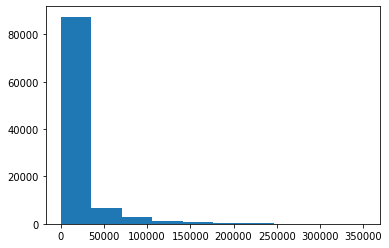

In [22]:
%matplotlib inline 
plt.hist(areas[:100000])

In [42]:
max(areas)

368000

(array([4.566e+03, 9.680e+02, 9.940e+02, 2.810e+02, 1.210e+02, 1.090e+02,
        1.810e+02, 2.230e+02, 2.020e+02, 2.360e+02, 1.710e+02, 1.500e+02,
        1.130e+02, 6.200e+01, 6.200e+01, 5.000e+01, 5.100e+01, 2.800e+01,
        2.300e+01, 2.600e+01, 2.000e+01, 2.300e+01, 1.600e+01, 2.300e+01,
        2.200e+01, 1.700e+01, 2.800e+01, 2.600e+01, 3.400e+01, 3.400e+01,
        2.700e+01, 3.300e+01, 2.700e+01, 3.500e+01, 1.900e+01, 4.400e+01,
        2.300e+01, 4.100e+01, 3.500e+01, 3.000e+01, 3.700e+01, 3.200e+01,
        3.500e+01, 3.400e+01, 2.200e+01, 2.100e+01, 3.200e+01, 2.500e+01,
        2.300e+01, 2.500e+01, 2.300e+01, 7.000e+00, 1.800e+01, 1.900e+01,
        1.900e+01, 2.100e+01, 7.000e+00, 1.500e+01, 1.000e+01, 1.200e+01,
        6.000e+00, 8.000e+00, 1.100e+01, 1.100e+01, 6.000e+00, 5.000e+00,
        4.000e+00, 5.000e+00, 1.100e+01, 1.300e+01, 1.000e+01, 9.000e+00,
        1.100e+01, 5.000e+00, 1.000e+00, 1.000e+01, 7.000e+00, 9.000e+00,
        4.000e+00, 4.000e+00, 3.000e+0

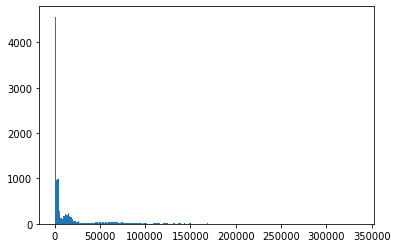

In [44]:
%matplotlib inline 
data = areas[:10000]
binwidth = 1600
plt.hist(data, bins=range(min(areas), max(data) + binwidth, binwidth))

In [5]:
annotations = np.load(f'/data2/saaket/annotations_{mode}_perspective.npy', allow_pickle=True)

In [67]:
def compute_area_distribution_annotations(bounding_boxes):
    areas = []
    for i in range(len(annotations)):
        for annotation in annotations[i]:
            slice, box = annotation 
            area = compute_area(box)
            areas.append(area)
            
    return np.array(areas)



In [68]:
ann_areas = compute_area_distribution_annotations(annotations)

In [74]:
(len(ann_areas[ann_areas > 20000]) / len(ann_areas))

0.45769356419470764

In [7]:
targets_array = np.load(f'/data1/saaket/lsd_data/data/processed/sdr_{mode}_perspective_targets_x_y.npy', allow_pickle=True)
def touchdown_loader(data_path):
    texts, panoids, targets = [], [], []
    with open(data_path) as f:
        for idx, line in enumerate(f):
            obj = json.loads(line)
            center = json.loads(obj['main_static_center'])
            panoids.append(obj['main_pano'])
            texts.append(obj['td_location_text'])
            targets.append(targets_array[idx][obj['main_pano']])
    return texts, panoids, targets 

In [8]:
texts, panoids, targets = touchdown_loader('/data1/saaket/touchdown/data/dev.json')

In [10]:
len(targets), len(annotations)

(1391, 1391)

In [28]:
def dist_function(target_slice, target_x, target_y, box_slice, box):
    x1, y1, x2, y2 = box 

    cx = (x1 + x2) / 2
    cy = (y1 + y2) / 2 
    WIDTH = 460 
    HEIGHT = 800 
    print("Target Slice: ", target_slice)
    print("Box Slice: ", box_slice)
    print("target_x: ", target_x)
    print("cx: ", cx)
    print("target_y: ", target_y)
    print("cy: ", cy)
    if target_slice > box_slice:
        x = (WIDTH - cx) + WIDTH*(target_slice-box_slice) + (target_x)
    elif target_slice < box_slice:
        x = (WIDTH - target_x) + WIDTH*(box_slice-target_slice) + cx
    else:
        x = cx - target_x 
    print(x)
    y = cy - target_y 
    return np.sqrt(x**2 + y**2)
    

In [29]:
def distance_from_touchdown(targets, annotations):
    dist_from_touchdown = []
    for idx, annotation in enumerate(annotations):
        target_slice, target_x, target_y = targets[idx]
        for slice_and_box in annotation:
            slice_id, box = slice_and_box 
            
            print(dist_function(target_slice, target_x, target_y, slice_id, box))
            return 


In [30]:
distance_from_touchdown(targets, annotations)

Target Slice:  3
Box Slice:  2
target_x:  241
cx:  93.5
target_y:  488
cy:  450.5
1067.5
1068.1584620270535


In [24]:
np.sqrt(607.5**2 + (488-241)**2)

655.7936032014951